In [2]:
pip install pyspark

     |████████████████████████████████| 212.4 MB 62 kB/s 
     |████████████████████████████████| 198 kB 37.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=080652ef67d66a64a3521c82540b5d2ea04996a23546bdc1f2fc281e005ee18b
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [11]:
from pyspark import SparkContext
import re
import string
from pyspark import SparkConf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
from wordcloud import WordCloud
sc = SparkContext("local", "program app")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
def cleanUp(word):
    word = regex.sub('', word)
    word = word.strip('"\'`”’“')
    return word

In [6]:
def removeStopWords(tokens, stop_words):
    filteredWords = []
    for w in tokens:
        cleanWord = cleanUp(w.lower())
        if cleanWord not in stop_words:
            filteredWords.append(cleanWord)
    return filteredWords

In [7]:
def stringtodict(counts):
    d = {}
    for count in counts :
        d[count[0]] = count[1]
    return d

[('', 1258430), ('said', 56713), ('mr', 44626), ('one', 18374), ('would', 17198), ('new', 17073), ('like', 13932), ('people', 12818), ('also', 12511), ('two', 11477), ('last', 10845), ('ms', 10552), ('first', 10460), ('years', 10001), ('time', 9821), ('year', 9754), ('could', 9489), ('http', 8890), ('url', 8889), ('trump', 8279), ('many', 8215), ('even', 7633), ('state', 7232), ('percent', 6931), ('city', 6924), ('company', 6696), ('states', 6518), ('made', 6384), ('united', 6338), ('york', 6305), ('may', 6266), ('back', 5846), ('world', 5844), ('make', 5813), ('much', 5804), ('million', 5785), ('still', 5696), ('get', 5691), ('way', 5677), ('three', 5532), ('work', 5403), ('president', 5279), ('since', 5226), ('going', 4982), ('american', 4948), ('government', 4924), ('game', 4920), ('including', 4918), ('day', 4829), ('another', 4773), ('think', 4771), ('say', 4738), ('home', 4625), ('part', 4554), ('week', 4543), ('well', 4476), ('group', 4472), ('team', 4415), ('around', 4413), ('p

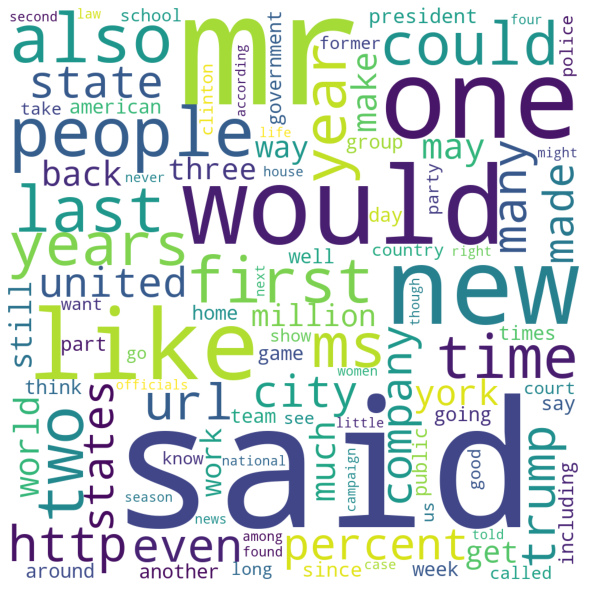

In [15]:
stop_words = set(stopwords.words('english'))

text_file = sc.textFile("nytimes_news_articles.txt")

counts = text_file.flatMap(lambda line: removeStopWords(word_tokenize(line), stop_words))
counts1 = counts.map(lambda word: (word, 1))
counts2 = counts1.reduceByKey(lambda a, b: a + b, 1)
counts3 =counts2.map(lambda x: (x[1],x[0]))

counts4=counts3.sortByKey(0, 1)
counts5 = counts4.map(lambda x: (x[1],x[0])).take(100) 

print(counts5)
wordcloud(counts5)